In [55]:
import pandas as pd
import numpy as np
import re
import random
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.wsd import lesk
import nltk
import string
from collections import defaultdict
stopwords = set(stopwords.words('english'))

In [2]:
df1 = pd.read_csv('cr28d_training_sentenceses.csv',encoding='utf-16')
df2 = pd.DataFrame(df1.iloc[0, [0,1,2,3]]).transpose()
df2.iloc[0, 0] = 406
df2.iloc[0, 2] = 1406
#df2.to_excel('output_sen.xlsx')

In [17]:
df2

,cr28d_column1,importsequencenumber,cr28d_name,cr28d_sentence
0,406,NaN,1406,hello get me my Invoice ; BI CODE is - Cumberl...


In [10]:
df2

,cr28d_column1,importsequencenumber,cr28d_name,cr28d_sentence
0,405,NaN,1405,hello get me my Invoice ; BI CODE is - Cumberl...


In [3]:
df1

,cr28d_column1,importsequencenumber,cr28d_name,cr28d_sentence,statuscode,statecode,timezoneruleversionnumber,cr28d_training_sentencesid,utcconversiontimezonecode,versionnumber,owningbusinessunit
0,405,NaN,1405,hello get me my Invoice ; BI CODE is - Cumberl...,1,0,NaN,7d6061c2-f20b-ee11-8f6e-000d3a0a1299,NaN,1727984,b239c97c-8b02-ee11-8f6e-000d3af4524f
1,404,NaN,1406,What's up give me my Invoice . Here's my infor...,1,0,NaN,7e6061c2-f20b-ee11-8f6e-000d3a0a1299,NaN,1727983,b239c97c-8b02-ee11-8f6e-000d3af4524f
2,406,NaN,1404,hello . invoice status . number of my invoice ...,1,0,NaN,7c6061c2-f20b-ee11-8f6e-000d3a0a1299,NaN,1727982,b239c97c-8b02-ee11-8f6e-000d3af4524f
3,402,NaN,1401,What's up ; give me my Invoice Here's my infor...,1,0,NaN,796061c2-f20b-ee11-8f6e-000d3a0a1299,NaN,1727981,b239c97c-8b02-ee11-8f6e-000d3af4524f
4,401,NaN,1402,hello give me invoice details. my BICODE is : ...,1,0,NaN,7a6061c2-f20b-ee11-8f6e-000d3a0a1299,NaN,1727980,b239c97c-8b02-ee11-8f6e-000d3af4524f
...,...,...,...,...,...,...,...,...,...,...,...
402,7,NaN,1006,"Hey , give me invoice . My data is: invoice wa...",1,0,NaN,cb5061bc-f20b-ee11-8f6e-000d3a0a1299,NaN,1726300,b239c97c-8b02-ee11-8f6e-000d3af4524f
403,2,NaN,1001,"hello ; get me my Invoice , Details: my busine...",1,0,NaN,c55061bc-f20b-ee11-8f6e-000d3a0a1299,NaN,1726298,b239c97c-8b02-ee11-8f6e-000d3af4524f
404,0,NaN,1003,I privation status of my invoice . inv num: W0...,1,0,NaN,c75061bc-f20b-ee11-8f6e-000d3a0a1299,NaN,1726297,b239c97c-8b02-ee11-8f6e-000d3af4524f
405,1,NaN,1002,"hello , give me my Invoice ; I have the follow...",1,0,NaN,c85061bc-f20b-ee11-8f6e-000d3a0a1299,NaN,1726296,b239c97c-8b02-ee11-8f6e-000d3af4524f


In [116]:
df3 = pd.read_csv("cr28d_normal_datas.csv"
                 ,encoding='utf-16')

In [117]:
df3["cr28d_bi_code"] # combine this and the other...

0      Ground Force
1      Ground Force
2      Ground Force
3      Ground Force
4      Ground Force
           ...     
995      Jetco Corp
996      Jetco Corp
997      Jetco Corp
998      Jetco Corp
999      Jetco Corp
Name: cr28d_bi_code, Length: 1000, dtype: object

In [8]:


df = pd.read_csv("cr28d_5k_training_datas.csv"
                 ,encoding='utf-16')


In [9]:
df

,cr28d_5k_training_dataid,cr28d_bi_code,cr28d_entity,importsequencenumber,cr28d_invoicedate,cr28d_invoicenumber,cr28d_name,statuscode,statecode,timezoneruleversionnumber,cr28d_username,utcconversiontimezonecode,cr28d_vendor_id,versionnumber,owningbusinessunit
0,7eed4fd1-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-11-18 05:00:00.0000000,1939989,5998,1,0,4,nicky.williams,NaN,2013155,2237869,b239c97c-8b02-ee11-8f6e-000d3af4524f
1,7fed4fd1-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-11-18 05:00:00.0000000,1939486,5996,1,0,4,nicky.williams,NaN,2013155,2237868,b239c97c-8b02-ee11-8f6e-000d3af4524f
2,7ced4fd1-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-11-18 05:00:00.0000000,1939612,5997,1,0,4,nicky.williams,NaN,2013155,2237867,b239c97c-8b02-ee11-8f6e-000d3af4524f
3,7ded4fd1-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-11-18 05:00:00.0000000,1939955,5999,1,0,4,nicky.williams,NaN,2013155,2237866,b239c97c-8b02-ee11-8f6e-000d3af4524f
4,7bed4fd1-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-11-18 05:00:00.0000000,1941604,5993,1,0,4,nicky.williams,NaN,2013155,2237865,b239c97c-8b02-ee11-8f6e-000d3af4524f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,97e86ea7-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-09-20 04:00:00.0000000,0804062,1005,1,0,4,sarah.hsuneeley,NaN,2262741,2232838,b239c97c-8b02-ee11-8f6e-000d3af4524f
4996,95e86ea7-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-09-30 04:00:00.0000000,7188630,1003,1,0,4,nicky.williams,NaN,10381,2232836,b239c97c-8b02-ee11-8f6e-000d3af4524f
4997,92e86ea7-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-10-30 04:00:00.0000000,19-4255,1000,1,0,4,sarah.hsuneeley,NaN,2538218,2232835,b239c97c-8b02-ee11-8f6e-000d3af4524f
4998,93e86ea7-f327-ee11-9965-000d3a0a1299,55,GFL49,NaN,2019-09-20 04:00:00.0000000,0804064,1001,1,0,4,sarah.hsuneeley,NaN,2262741,2232834,b239c97c-8b02-ee11-8f6e-000d3af4524f


In [10]:
df = df[["cr28d_bi_code", "cr28d_username", "cr28d_invoicedate", "cr28d_invoicenumber", "cr28d_vendor_id","cr28d_entity"]]

In [11]:
df.head()

,cr28d_bi_code,cr28d_username,cr28d_invoicedate,cr28d_invoicenumber,cr28d_vendor_id,cr28d_entity
0,55,nicky.williams,2019-11-18 05:00:00.0000000,1939989,2013155,GFL49
1,55,nicky.williams,2019-11-18 05:00:00.0000000,1939486,2013155,GFL49
2,55,nicky.williams,2019-11-18 05:00:00.0000000,1939612,2013155,GFL49
3,55,nicky.williams,2019-11-18 05:00:00.0000000,1939955,2013155,GFL49
4,55,nicky.williams,2019-11-18 05:00:00.0000000,1941604,2013155,GFL49


In [70]:
for i in df['cr28d_username']:
    print(i)

nicky.williams
nicky.williams
nicky.williams
nicky.williams
nicky.williams
nicky.williams
nicky.williams
nicky.williams
nicky.williams
nicky.williams
nicky.williams
nicky.williams
sarah.hsuneeley
nicky.williams
nicky.williams
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
nicky.williams
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
nicky.williams
maxine.oakley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
nicky.williams
sarah.hsuneeley
nicky.williams
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
nicky.williams
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley
nicky.williams
sarah.hsuneeley
nicky.williams
sarah.hsuneeley
sarah.hsuneeley
sarah.hsuneeley

In [251]:
df.columns

Index(['cr28d_bi_code', 'cr28d_username', 'cr28d_invoicedate',
       'cr28d_invoicenumber', 'cr28d_vendor_id', 'cr28d_entity'],
      dtype='object')

In [95]:
invoices = {i:[] for i in range(4)} #defaultdict(int)
entities_lst = ["GFL49"]*600


In [61]:
"\w+-\w+(?:\s\w+)*(?:-\w+)*" == "\w+-\w+(?:\s\w+)*(?:-\w+)*"

True

In [62]:
def find_invoice(st_inv):    
    if re.findall(r"(?:\w+\s\w+)+", st_inv):
        return (re.findall(r"(?:\w+\s\w+)+", st_inv)[0],0)
    
    if re.findall(r"\w+-\w+(?:\s\w+)*(?:-\w+)*", st_inv):
        return (re.findall(r"\w+-\w+(?:\s\w+)*(?:-\w+)*", st_inv)[0],1)
        
    if re.findall(r"\w+", st_inv): # in the end
        return (re.findall(r"\w+", st_inv)[0], 2)
    
    return [st_inv,3]
       
    
for inv in df["cr28d_invoicenumber"]:
    inv_found,group = find_invoice(inv)
    invoices[group].append(inv_found)

print(len(invoices[0]),len(invoices[1]),len(invoices[2]),len(invoices[3]))
    

438 646 4066 0


In [137]:
"""
def generate_inds_invoices(n,b,col):
    
    res = []
    
    while len(res) < n:
        ind = random.randint(0,b)
        res.append(col[ind])
        res = list(set(res))
    return res

inds_1 = generate_inds_invoices(200, 437, invoices[0])
inds_2 = generate_inds_invoices(200, 645, invoices[1])
inds_3 = generate_inds_invoices(200, 4065, invoices[2])

invoices_lst = inds_1+inds_2+inds_3
random.shuffle(invoices_lst)
"""

'\ndef generate_inds_invoices(n,b,col):\n    \n    res = []\n    \n    while len(res) < n:\n        ind = random.randint(0,b)\n        res.append(col[ind])\n        res = list(set(res))\n    return res\n\ninds_1 = generate_inds_invoices(200, 437, invoices[0])\ninds_2 = generate_inds_invoices(200, 645, invoices[1])\ninds_3 = generate_inds_invoices(200, 4065, invoices[2])\n\ninvoices_lst = inds_1+inds_2+inds_3\nrandom.shuffle(invoices_lst)\n'

In [98]:
class generate_inds:
    def __init__(self, n, b, col):
        self.n = n
        self.b = b
        self.col = col
        
    def generate_data(self):
        res = []
    
        while len(res) < self.n:
            ind = random.randint(0,self.b)
            res.append(self.col[ind])
            res = list(set(res))
        return res
    
    def generate_data_2(self):
        res = []
    
        while len(res) < self.n:
            ind = random.randint(0,self.b)
            res.append(ind)
            res = list(set(res))
        
        
        l = self.col.tolist() # series
        
        return [l[i] for i in res]

e1 = generate_inds(200, 437, invoices[0])
e2 = generate_inds(200, 645, invoices[1])
e3 = generate_inds(200, 4065, invoices[2])

inds_1 = e1.generate_data()
inds_2 = e2.generate_data()
inds_3 = e3.generate_data()

invoices_lst = inds_1+inds_2+inds_3
random.shuffle(invoices_lst)

In [123]:
e4 = generate_inds(600, 4999, df['cr28d_username'])
e5 = generate_inds(600, 4999, df['cr28d_vendor_id'])
e6 = generate_inds(600, 4999, df['cr28d_invoicedate'])
e7 =  generate_inds(300, 4999, df['cr28d_bi_code'])
e8 = generate_inds(300, 999, df3["cr28d_bi_code"])

vendors_lst = e5.generate_data()
usernames_lst = e4.generate_data_2()
date_lst = e6.generate_data_2()
bi_lst = e7.generate_data_2() + e8.generate_data_2()

random.shuffle(vendors_lst)
random.shuffle(usernames_lst)
random.shuffle(date_lst)
random.shuffle(bi_lst)

In [121]:
print(len(vendors_lst),len(usernames_lst),len(date_lst),len(bi_lst))

600 600 600 600


In [125]:
new_df = pd.DataFrame({"Invoice_Number":invoices_lst, "Vendor_Name":vendors_lst,
                      "BI_code":bi_lst, "Entity":entities_lst, "User_Name":usernames_lst, "Date":date_lst})

In [126]:
new_df

,Invoice_Number,Vendor_Name,BI_code,Entity,User_Name,Date
0,200711094788,2956031,55,GFL49,rita.wurschum,2019-10-31 04:00:00.0000000
1,109635,2544423,Grand Prairie,GFL49,maxine.oakley,2019-11-26 05:00:00.0000000
2,3708-000017155,1786341,Cumberland,GFL49,nicky.williams,2019-11-25 05:00:00.0000000
3,0378467 2,2307364,44,GFL49,sarah.hsuneeley,2019-12-04 05:00:00.0000000
4,0685-001187124,3036607,Chemainus,GFL49,jeannette.wilkerson,2019-12-01 05:00:00.0000000
...,...,...,...,...,...,...
595,0609-000680914,2853867,Saskatoon,GFL49,alexis.singletary,2019-11-03 04:00:00.0000000
596,0974-000557509,2771061,Cranbrook Hauling TS LF,GFL49,sarah.hsuneeley,2019-12-01 05:00:00.0000000
597,0016966113,3044893,Vancouver Hauling,GFL49,stephanie.walker,2019-12-01 05:00:00.0000000
598,15197,2533231,59,GFL49,rita.wurschum,2019-09-20 04:00:00.0000000


In [127]:
#for i in range(100):
 #   print(generate_beginning())

In [134]:
class generate_text_sen:
    def __init__(self, df):
        self.df = df


    PROB = 0.4
    ADD_REC = 0.3
    SKIP = 0.45

    not_desired = ["invoice", "status", "want", "sup", "let"]

    @staticmethod
    def generate_sequence():
        x = [1,2,3,4,5,6]
        random.shuffle(x)
        return x

    # Function to get synonyms of a word\
    @staticmethod
    def get_synonyms(word):
        puncs = string.punctuation
        word = word.lower()
        if len(set(puncs).intersection(set(word))) > 0 or word in stopwords or word in not_desired:
            return [[word], False]

        synonyms = []
        for syn in wordnet.synsets(word):
            for lemma in syn.lemmas():
                synonym = lemma.name().replace("_", " ")
                if synonym not in synonyms:
                    synonyms.append(synonym)

        return [synonyms, True]

    # Function to get the best synonym based on context
    @staticmethod
    def get_best_synonym(word, synonyms):
        max_similarity = -1
        best_synonym = None
        word_synsets = wordnet.synsets(word)
        for synonym in synonyms:
            synonym_synsets = wordnet.synsets(synonym)
            for word_synset in word_synsets:
                for synonym_synset in synonym_synsets:
                    similarity = word_synset.wup_similarity(synonym_synset)
                    if similarity is not None and similarity > max_similarity:
                        max_similarity = similarity
                        best_synonym = synonym
        if not best_synonym:
            return word
        return best_synonym


    def generate_beginning(self):
        options_a = ["Hello", "Hi", "Hey", "What's up", "Sup",
                         "Yo",
                    "Howdy",
                    "Hi there",
                    "Hey there",
                    "Hiya",
                    "Greetings",
                    "Hey hey",
                    "What's happening",
                    "What's going on",
                    "Heya",
                ]

        inter = [",", ".", ";"]

        last_punc = ""
        last_sen = ""

        options_b = ["I want to get my Invoice Status", "I would like to have the invoice", "I want status of my invoice", "Give me my Invoice", "Get me my Invoice",\
                    'what is my invoice status', 'give me invoice', 'invoice status',
                         "Can you provide the status of my invoice?",
                    "I'm interested in knowing the status of my invoice.",
                    "Please inform me about my invoice status.",
                    "Could you give me an update on my invoice?",
                    "I'm inquiring about the status of my invoice.",
                    "What's the current status of my invoice?",
                    "May I know the status of my invoice?",
                    "I need information about the status of my invoice.",
                    "Is there any update on my invoice status?",
                    "I'm curious about the status of my invoice.",
                    "Kindly provide me with the status of my invoice.",
                    "Let me know the current status of my invoice.",
                    "Could you check the status of my invoice?",
                    "Please check and let me know the invoice status.",
                    "I'd like to check my invoice status.",
                    "Any news on the status of my invoice?",
                    "Do you have any information on my invoice status?",
                    "I want to get an update on my invoice.",
                    "Please provide me with my invoice status.",
                    ]

        options_c = ["Here's my information: ", "My Data is: ", "I have the following information",\
                    " ", "My details are - ", "Details: ", 'Info', "Details", "I have the following details ",
                         "This is my data: ",
                        "Here's the information I have: ",
                        "I'd like to share my details: ",
                        "Allow me to provide my information: ",
                        "Below is my data: ",
                        "My details as follows: ",
                        "Please find my information: ",
                        "My details include: ",
                        "Here's what I have: ",
                        "Sharing my details: ",
                        "My information is as below: ",
                        "I'm providing the following data: ",
                        "These are my details: ",
                        "Let me share my info: ",
                        "Check out my information: ",
                        "Here's what you need to know: ",
                        "I have the following data: ",
                        "My info: ",
                        "These are my particulars: ",
                    ]

        gen = [options_a,inter,options_b,inter,options_c]


        n = len(gen)
        res = []
        num_puncs = 0


        for i in range(n):
            current = gen[i]
            if i in [1,3]:
                if len(res) == 0 or ((len(res)-num_puncs) == num_puncs) or last_punc:
                    continue
                else:
                    if random.random() <= 1:
                        last_punc = random.choice(current)
                        res.append(last_punc)
                        num_puncs += 1
                    continue

            if random.random() >= self.SKIP:
                ch = random.choice(current)

                if ":" in ch or "." in ch or "-" in ch or "?" in ch:
                    last_punc = True

                res.append(ch)
                continue

                ch = ch.split()
                for word in ch:
                    synos,flag = self.get_synonyms(word)

                    if not flag:
                        res.append(synos[0])
                    else:
                        best = self.get_best_synonym(word, synos)
                        res.append(best)
                        
        res = " ".join(res)
        if len(res) == 0:
            return " "

        return res if last_punc else res + '.'


    def generate_BI(self, index):
        df = self.df
        data = df.loc[index, 'BI_code']
        data = str(data)
        choices = ["my BICODE is : ", 'the BI_CODE = ', "Business Unit ID is ", "BUID = ", 'bi code = ', "my code is : ", \
                   "BI CODE is - ", 'my business code is ', "business code is something like this: ", 'Unit ID: ', "code is: ",
                  "business unit code is ", "consider my bi name "    "BI Identifier: ",
                    "BI code goes by: ",
                    "The Business Code reads: ",
                    "BI Reference: ",
                    "The BI identifier is: ",
                    "For tracking purposes, my BI code: ",
                    "BI Number is as follows: ",
                    "Code assigned to this BI: ",
                    "BI code mentioned as: "
                ]

        res = [random.choice(choices),data]
        return "".join(res)



    def generate_UserName(self, index):
        df = self.df
        data = df.loc[index, 'User_Name']
        data = str(data)
        choices = ["the username of the person who created invoice : ", 'username = ', 
                   "USERNAME is ",'name = ', "invoice was created by ",
                   "userNAME - ", 'person who created my invoice: ', "USERNAME: ", 
                   'USERNAME =  ', "created by ",     "submitted by the user: ",
                    "by the following user - ",
                    "created by user with username: ",
                    "from the user named ",
                    "USERNAME created the invoice with details: ",
                    "this invoice was authored by: ",
                    "the creator's username is ",
                    "generated by the user: ",
                    "the author of the invoice is ",
                    "Invoice created by the user: "]

        res = [random.choice(choices),data]
        return "".join(res)

    def generate_date(self, index):
        df = self.df
        data = df.loc[index, 'Date']
        choices = ["Date when invoice was created: ", "invoice was created on: ", "date is ", "dates = ", 
                  "date of the invoice creation is: ", 'the time when my invoice was created is: ', "dates - ", 'date: ',
                   "The invoice was generated on: ",
                    "Creation date mentioned as: ",
                    "Invoice creation date recorded as: ",
                    "Date of invoice generation: ",
                    "The date of invoice creation is: ",
                    "On this date, the invoice was made: ",
                    "Invoice created on: ",
                    "The date when the invoice was formed: ",
                    "Invoice date specified as: ",
                    "Date of origin: "
                ]

        res = [random.choice(choices),data]
        return "".join(res)


    def generate_InvoiceNum(self, index):
        df = self.df
        data = df.loc[index, 'Invoice_Number']
        data = str(data)
        choices = ["i have the follwoing Invoice Number: ", "InvoiceNum is ", "InvoiceNum = ", "InvoiceNum: ", "InvNum = ", 
                  "my inv num is ", 'inv num: ', "INVOICE Num: ", "number of my invoice is: ", "Inv_Num is ", "Inv_Num: ", 
                  "invoice Number = ", "num of my inv - ", 'num of my inv is', "number of my invoice = ", "number of my invoice ",    "Here's the Invoice Number: ",
                    "Invoice Number recorded as: ",
                    "The InvoiceNum is mentioned as: ",
                    "This is the invoice number: ",
                    "Invoice identifier reads: ",
                    "Invoice Number mentioned: ",
                    "InvoiceNum goes by: ",
                    "My InvoiceNum: ",
                    "InvoiceNum specified as: ",
                    "Invoice Number provided is: "
                ]

        res = [random.choice(choices),data]
        return "".join(res)


    def generate_Vendor(self, index):
        df = self.df
        data = df.loc[index, 'Vendor_Name']
        data = str(data)
        choices = ["i have the follwoing Vendor ID: ", "VENDORID is ", "VENDOR_ID = ", "vendor id: ", "ven id = ", 
                  "my vend id ", 'Vendor_Id: ', "id of my Vendor : ", "id of my Vendor = ", "Vendor_Id is", "Vendor ID ", 
                  "ven id ", "my vendor id is ", 'vendor id - ', "my VENDOR_ID is ",  "Here's the Vendor ID: ",
                "Vendor ID recorded as: ",
                "The VENDORID is mentioned as: ",
                "This is the vendor ID: ",
                "Vendor identifier reads: ",
                "Vendor ID mentioned: ",
                "VendorId goes by: ",
                "My Vendor_Id: ",
                "Vendor ID specified as: ",
                "Vendor ID provided is: "
            ]

        res = [random.choice(choices),data]
        return "".join(res)


    def generate_Entity(self, index):
        df = self.df
        data = df.loc[index, 'Entity']
        data = str(data)
        choices = ['my entity name is ','the name of an enity is ', 'enity name: ', 'enity id = ', 'entity name -  ', 
                   "I have the following name of invoice entity: ", 'ent id = ', 'ENTITY_ID is : ',
                       'The entity name is: ',
                    'Entity name recorded as: ',
                    'The entity is named: ',
                    'Entity identifier reads: ',
                    'The name of the entity is: ',
                    'Entity name mentioned: ',
                    'EntityName goes by: ',
                    'My entity name: ',
                    'Entity name specified as: ',
                    'Entity name provided is: '
                ]


        res = [random.choice(choices),data]
        return "".join(res)


    def generate_intermediate(self):
        puncs = [",",";"]
        stop_word = ["and", 'also', "besides"]
        choices =  [0,1]

        ch = random.choice(choices)

        if ch == 0:
            return random.choice(puncs)

        return random.choice(stop_word)



    def generate_end(self):
        return "Thank you"


    def get_sentence(self,seq,index):
        res = [self.generate_beginning()]
        flag = False
        puncs = 0

        last_elem = True

        for comp in seq:
            if random.random() >= self.ADD_REC:
                flag = True
                last_elem = True
                if comp == 1:
                    res.append(self.generate_BI(index))
                elif comp == 2:
                    res.append(self.generate_UserName(index))
                elif comp == 3:
                    res.append(self.generate_date(index))
                elif comp == 4:
                    res.append(self.generate_InvoiceNum(index))
                elif comp == 5:
                    res.append(self.generate_Vendor(index))
                elif comp == 6: # else
                    res.append(self.generate_Entity(index))

            if 0.4 >= random.random(): # 60%

                if len(res) <= 1 or ((len(res)-puncs) == puncs) or seq.index(comp) == (len(seq)-1) or not last_elem:
                    continue

                res.append(self.generate_intermediate())
                last_elem = False
                puncs += 1

        if flag:
            if self.PROB >= random.random():
                res.append(self.generate_end())

        return " ".join(res)


    def get_df(self,n):
        res = []

        for i in range(n):
            seq = self.generate_sequence()
            sentence = self.get_sentence(seq,i)
            res.append(sentence)

        res = pd.DataFrame({"Sentence":res})
        return res

c1 = generate_text_sen(new_df)
final = c1.get_df(600)

In [135]:
for i in final.Sentence:
    print(i)
    print()

I want to get an update on my invoice. business code is something like this: 55 Entity identifier reads: GFL49 Vendor ID 2956031 InvoiceNum is 200711094788 invoice was created on: 2019-10-31 04:00:00.0000000

Here's what you need to know:  BI Number is as follows: Grand Prairie , EntityName goes by: GFL49 Vendor ID mentioned: 2544423 The date of invoice creation is: 2019-11-26 05:00:00.0000000 besides created by maxine.oakley Thank you

  the name of an enity is GFL49 also dates = 2019-11-25 05:00:00.0000000 also ven id = 1786341 BI code goes by: Cumberland ; USERNAME =  nicky.williams

Greetings ; the creator's username is sarah.hsuneeley , VENDOR_ID = 2307364 ; Invoice Number mentioned: 0378467 2 dates - 2019-12-04 05:00:00.0000000 The entity name is: GFL49

Hey . I'd like to check my invoice status. Here's the information I have:  On this date, the invoice was made: 2019-12-01 05:00:00.0000000 invoice Number = 0685-001187124 Entity identifier reads: GFL49 Thank you

Hiya . This is m

In [136]:
final.to_excel("sentences_train.xlsx")

In [271]:
final.to_excel("sentences_train.xlsx")

In [4]:
data = {
    'a': [1, 2, 3, 4, 5],
    'b': [10, 20, 30, 40, 50],
    'c': [100, 200, 300, 400, 500]
}

# Create the DataFrame
df = pd.DataFrame(data)

In [6]:
df[["a","b","c"]].mean().to_dict()

{'a': 3.0, 'b': 30.0, 'c': 300.0}

In [15]:
random.random()

0.37812164128915204

In [2]:
df = pd.read_excel("preporcesed_data.xlsx")

In [3]:
df["onD-day-n"]

0       0
1       1
2       3
3       3
4       2
       ..
295    33
296    31
297    34
298    34
299    32
Name: onD-day-n, Length: 300, dtype: int64

In [12]:
s = df.sort_values(by="offD-date",ascending=True)
nums = list(range(1, s.shape[0]+1))

d = dict(zip(list(s.index), nums))

In [13]:
d

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 21: 5,
 8: 6,
 5: 7,
 17: 8,
 6: 9,
 9: 10,
 10: 11,
 11: 12,
 4: 13,
 20: 14,
 19: 15,
 46: 16,
 18: 17,
 25: 18,
 55: 19,
 15: 20,
 13: 21,
 7: 22,
 12: 23,
 16: 24,
 14: 25,
 22: 26,
 114: 27,
 28: 28,
 29: 29,
 45: 30,
 38: 31,
 33: 32,
 26: 33,
 30: 34,
 27: 35,
 24: 36,
 23: 37,
 31: 38,
 34: 39,
 35: 40,
 50: 41,
 48: 42,
 56: 43,
 47: 44,
 32: 45,
 44: 46,
 127: 47,
 124: 48,
 92: 49,
 39: 50,
 37: 51,
 42: 52,
 36: 53,
 61: 54,
 43: 55,
 52: 56,
 49: 57,
 40: 58,
 41: 59,
 57: 60,
 58: 61,
 60: 62,
 51: 63,
 54: 64,
 53: 65,
 86: 66,
 70: 67,
 122: 68,
 65: 69,
 67: 70,
 66: 71,
 151: 72,
 64: 73,
 59: 74,
 81: 75,
 77: 76,
 71: 77,
 73: 78,
 72: 79,
 181: 80,
 68: 81,
 63: 82,
 62: 83,
 230: 84,
 106: 85,
 93: 86,
 134: 87,
 91: 88,
 79: 89,
 69: 90,
 75: 91,
 82: 92,
 74: 93,
 83: 94,
 85: 95,
 78: 96,
 168: 97,
 96: 98,
 76: 99,
 80: 100,
 117: 101,
 90: 102,
 84: 103,
 88: 104,
 118: 105,
 112: 106,
 89: 107,
 87: 108,
 102: 109,
 99: 110,
 108

In [4]:
df = pd.read_excel("dim1.xlsx")

In [5]:
df

,Educational attainment,All levels of education,Less than high school 7,High school 8,College or trade 9,University 10
0,1995,10.6A,21.2A,11.8A,8.9A,5.7B
1,2000,6.9A,17.2B,7.8A,5.6A,4.3B
2,2001,7.4A,15.9B,8.3A,6.3A,5.5B
3,2002,8.0A,15.7B,9.5A,6.8A,5.8B
4,2003,7.5A,16.1B,8.4A,6.5A,5.6B
5,2004,7.8A,15.5B,8.7A,6.3A,6.6B
6,2005,6.9A,14.9B,7.4A,5.8A,5.7B
7,2006,6.2A,13.6B,7.3B,5.2B,4.4B
8,2007,6.4A,15.9B,7.3B,5.3B,4.5B
9,2008,6.0A,13.6B,6.9A,5.0A,4.8B


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Educational attainment   23 non-null     int64 
 1   All levels of education  23 non-null     object
 2   Less than high school 7  23 non-null     object
 3   High school 8            23 non-null     object
 4   College or trade 9       23 non-null     object
 5   University 10            23 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.2+ KB


In [66]:
df = pd.read_csv("articles1.csv")

In [67]:
df

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [68]:
def d(s):
    pat = re.findall(r"(?:2016|2017){1}-.+",s)
    if pat:
        return 1
    return None

In [69]:
df["check"] = df["date"].apply(lambda x : d(x))

In [77]:
df = df[df["check"].notnull()]

In [74]:
x = df["check"].notnull()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   id           50000 non-null  int64  
 2   title        50000 non-null  object 
 3   publication  50000 non-null  object 
 4   author       43694 non-null  object 
 5   date         50000 non-null  object 
 6   year         50000 non-null  float64
 7   month        50000 non-null  float64
 8   url          0 non-null      float64
 9   content      50000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB


In [6]:
from datetime import datetime

In [80]:
df["date"] = pd.to_datetime(df["date"])

C:\Users\La_Admin\AppData\Local\Temp\ipykernel_20212\3228555721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])


In [81]:
df

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,check
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,1.0
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",1.0
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",1.0
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",1.0
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",1.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers...",1.0
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...,1.0
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...,1.0
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...,1.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46359 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   46359 non-null  int64         
 1   id           46359 non-null  int64         
 2   title        46359 non-null  object        
 3   publication  46359 non-null  object        
 4   author       41530 non-null  object        
 5   date         46359 non-null  datetime64[ns]
 6   year         46359 non-null  float64       
 7   month        46359 non-null  float64       
 8   url          0 non-null      float64       
 9   content      46359 non-null  object        
 10  check        46359 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 4.2+ MB


In [83]:
import matplotlib.pyplot as plt

In [ ]:
pops = 

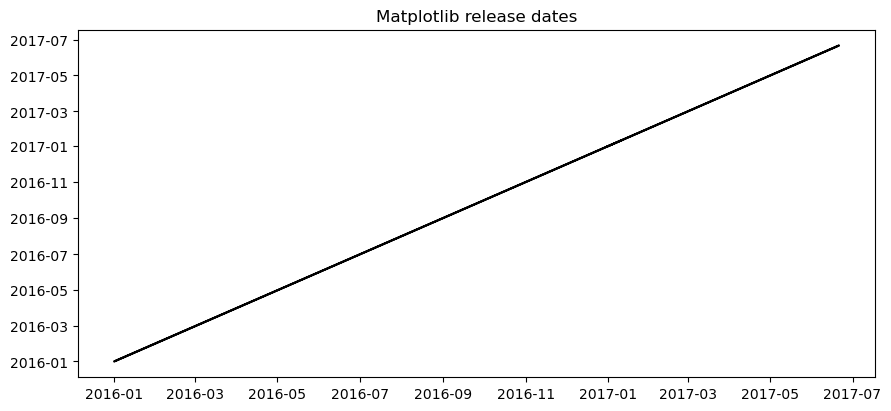

In [85]:
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Matplotlib release dates")
ax.plot(df["date"], df["date"] ,
        color="k", markerfacecolor="w")  # Baseline and markers on it.

In [20]:
np.zeros_like(df["date"])

array(['1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   50000 non-null  int64         
 1   id           50000 non-null  int64         
 2   title        50000 non-null  object        
 3   publication  50000 non-null  object        
 4   author       43694 non-null  object        
 5   date         50000 non-null  datetime64[ns]
 6   year         50000 non-null  float64       
 7   month        50000 non-null  float64       
 8   url          0 non-null      float64       
 9   content      50000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 3.8+ MB


In [127]:
#from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

word = "up"
synonyms = get_synonyms(word)

print(f"Synonyms of '{word}':")
for synonym in synonyms:
    print(synonym)

Synonyms of 'up':
up
up
astir
up
improving
up
up
upward
up
up
up
up
up
upwards
upward
upwardly
up
up
up
up
upwards
upward


In [152]:
synonyms = [] 
antonyms = [] 
for syn_set in wordnet.synsets("want"): 
    for l in syn_set.lemmas(): 
        synonyms.append(l.name()) 

print(set(synonyms)) 
print(set(antonyms)) 

{'neediness', 'want', 'wish', 'require', 'wishing', 'lack', 'deficiency', 'deprivation', 'need', 'privation', 'desire'}
set()
